<a href="https://colab.research.google.com/github/WaHMugdha/MoodBites/blob/main/moodbites_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pickle
# Load the pickle file for word2vec model
with open('/content/drive/MyDrive/Kaggle/word2vec_model.pkl', 'rb') as f:
    word2vec_model = pickle.load(f)

# Load the pickle file for dataset
with open('/content/drive/MyDrive/Kaggle/data_after_word2vec.pkl', 'rb') as f:
    data = pickle.load(f)

data = data.drop(columns=['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])
data['cleaned_reviews'] = data['cleaned_reviews'].apply(lambda tokens: ' '.join(tokens))
data.head()

Mounted at /content/drive


,url,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type,city,Sentiment_Score,Sentiment_Class,modified_reviews_list,cleaned_reviews
0,https://www.zomato.com/bangalore/jalsa-banasha...,2933,1,1,0.720882,0.611201,1,24,1972,0.557298,"('Rated 4.0', 'RATED\n A beautiful place to d...",0,1,0.7430,3,A beautiful place to dine in.The interiors tak...,beautiful place dine interior take back mughal...
1,https://www.zomato.com/bangalore/jalsa-banasha...,2933,1,1,0.720882,0.611201,1,24,1972,0.557298,"('Rated 4.0', 'RATED\n I was here for dinner ...",0,1,0.9486,4,I was here for dinner with my family on a week...,dinner family weekday restaurant completely em...
2,https://www.zomato.com/bangalore/jalsa-banasha...,2933,1,1,0.720882,0.611201,1,24,1972,0.557298,"('Rated 2.0', 'RATED\n Its a restaurant near ...",0,1,0.7964,3,Its a restaurant near to Banashankari BDA. Me ...,restaurant near banashankari bda along office ...
3,https://www.zomato.com/bangalore/jalsa-banasha...,2933,1,1,0.720882,0.611201,1,24,1972,0.557298,"('Rated 4.0', 'RATED\n We went here on a week...",0,1,0.9622,4,We went here on a weekend and one of us had th...,go weekend one u buffet two u take ala carte f...
4,https://www.zomato.com/bangalore/jalsa-banasha...,2933,1,1,0.720882,0.611201,1,24,1972,0.557298,"('Rated 5.0', 'RATED\n The best thing about t...",0,1,0.9461,4,The best thing about the place is itÃ\x83\x83Ã...,best thing place ambiance second best thing yu...


In [ ]:
data.columns

Index(['url', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list', 'type',
       'city', 'Sentiment_Score', 'Sentiment_Class', 'modified_reviews_list',
       'cleaned_reviews'],
      dtype='object')

In [ ]:
#adding the word embedding to the dataset and removing unnecessary columns
import numpy as np
from sklearn.preprocessing import StandardScaler

data.drop(columns=['votes', 'reviews_list', 'modified_reviews_list'], inplace=True)
data.rename(columns={'type': 'dining_type','cost': 'cost(for 2)'}, inplace=True)

scaler = StandardScaler()
columns_to_scale = ['cuisines', 'rest_type']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
import gensim
def text_to_word_embeddings(text, word2vec_model):
    word_embeddings = []
    for word in text.split():
        if word in word2vec_model.wv:
            word_embeddings.append(word2vec_model.wv[word])
    return np.array(word_embeddings)

data['word_embeddings_of_reviews'] = data['cleaned_reviews'].apply(text_to_word_embeddings, args=(word2vec_model,))
data.head()

,url,name,online_order,book_table,rate,location,rest_type,cuisines,cost(for 2),dining_type,city,Sentiment_Score,Sentiment_Class,cleaned_reviews,word_embeddings_of_reviews
0,https://www.zomato.com/bangalore/jalsa-banasha...,2933,1,1,0.720882,1,-0.684284,1.1181,0.557298,0,1,0.7430,3,beautiful place dine interior take back mughal...,"[[2.0981128, 1.815063, -6.8484993, 1.6597033, ..."
1,https://www.zomato.com/bangalore/jalsa-banasha...,2933,1,1,0.720882,1,-0.684284,1.1181,0.557298,0,1,0.9486,4,dinner family weekday restaurant completely em...,"[[0.77261764, 3.2976336, 1.0144088, -5.099168,..."
2,https://www.zomato.com/bangalore/jalsa-banasha...,2933,1,1,0.720882,1,-0.684284,1.1181,0.557298,0,1,0.7964,3,restaurant near banashankari bda along office ...,"[[4.081995, 4.763423, -2.1862926, 3.2217922, -..."
3,https://www.zomato.com/bangalore/jalsa-banasha...,2933,1,1,0.720882,1,-0.684284,1.1181,0.557298,0,1,0.9622,4,go weekend one u buffet two u take ala carte f...,"[[2.0472045, 0.7242372, 3.7346416, -0.51295847..."
4,https://www.zomato.com/bangalore/jalsa-banasha...,2933,1,1,0.720882,1,-0.684284,1.1181,0.557298,0,1,0.9461,4,best thing place ambiance second best thing yu...,"[[1.6863357, 7.823443, -0.32242757, -0.3208254..."


In [ ]:
data['location'].nunique()

90

In [ ]:
# location = 22 is the BTM neighbourhood  Byrasandra, Tavarekere and Madiwala Layout
data['location'].value_counts().sort_values(ascending=False)

44    132029
0      84821
27     73570
22     64408
55     56257
       ...  
81        29
38        27
23        17
88        15
65         9
Name: location, Length: 90, dtype: int64

In [ ]:
new_df = data[data['location'] == 22]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# columns_to_scale = ['dining_type', 'city']
new_df[['dining_type']] = scaler.fit_transform(new_df[['dining_type']])
new_df.head()

In [ ]:
new_df.shape

(64408, 15)

In [ ]:
import pickle
with open('/content/drive/MyDrive/Kaggle/data location = 22(BTM).pkl', 'wb') as f:
  pickle.dump(new_df, f)

---
---



In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
data_btm = pd.read_pickle('/content/drive/MyDrive/Kaggle (1)/data location = 22(BTM).pkl')
data_btm.head()

In [ ]:
data_btm.shape

(64408, 15)

# SVM
---
(WITHOUT WORD EMBEDDINGS)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score
from sklearn.svm import SVC
data_btm['Sentiment_Class'] = data_btm['Sentiment_Class'].astype(int)

x = data_btm[['online_order', 'book_table', 'rate', 'rest_type', 'cuisines', 'cost(for 2)', 'dining_type' ]]
y = data_btm['Sentiment_Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(51526, 7)

In [ ]:
data_btm['Sentiment_Class'].value_counts()

4    31409
3    15565
2    10030
1     6019
0     1385
Name: Sentiment_Class, dtype: int64

In [ ]:
svm_model = SVC(kernel='poly', C=1.0, decision_function_shape='ovr')
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model.fit(x_train, y_train)

SVC(kernel='poly')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.5424623505666822
Precision: 0.4549462623328751
Recall: 0.5424623505666822
F1-score: 0.4560381105809704
Confusion Matrix:
 [[   0    1   69    9  196]
 [   0    6  415   90  656]
 [   0    8 1006  218  811]
 [   0   11  606  259 2198]
 [   0   11  438  157 5717]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1. **Accuracy**: The model's predictions are correct for about 54.2% of the instances.

2. **Precision**: The model predicts a positive instance, it is correct about 45.5% of the time.

3. **Recall**: The model correctly identifies about 54.2% of the actual positive instances.

4. **F1-score**: The F1-score is approximately 0.456, reflecting the balance between precision and recall in the model's predictions.

5. **Confusion Matrix**:
  - 0 instances were correctly classified as Class 1 (True Negatives).
  - 1 instance was incorrectly classified as Class 2 (False Positives).
  - 6 instances were correctly classified as Class 2 (True Positives).
  - 1006 instances were correctly classified as Class 3 (True Positives).
  - 259 instances were correctly classified as Class 4 (True Positives).
  - 5717 instances were correctly classified as Class 5 (True Positives).
  - rest were incorrectly classified

{Class 1: very bad, Class 2: bad, Class 3: neutral, Class 4: good, Class 5: very good}




In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       275
           1       0.16      0.01      0.01      1167
           2       0.40      0.49      0.44      2043
           3       0.35      0.08      0.14      3074
           4       0.60      0.90      0.72      6323

    accuracy                           0.54     12882
   macro avg       0.30      0.30      0.26     12882
weighted avg       0.45      0.54      0.46     12882



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle
file_path = '/content/drive/MyDrive/Kaggle/svm_model_model.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(svm_model, file)

# SVM
---
(WITH WORD EMBEDDINGS)


In [ ]:
import numpy as np
def compute_awe(embeddings_sequences):
    awe_list = [] #empty list to store average embeddings
    # Iterate over each sequence of word embeddings
    for sequence in embeddings_sequences:
        # Compute the average embedding for the sequence
        average_embedding = np.mean(sequence, axis=0)
        awe_list.append(average_embedding)
    return np.array(awe_list)

In [ ]:
from sklearn.model_selection import train_test_split
y = data_btm['Sentiment_Class']

awe_features = compute_awe(data_btm['word_embeddings_of_reviews'])
x_other_features = data_btm[['online_order', 'book_table', 'rate', 'rest_type', 'cuisines', 'cost(for 2)', 'dining_type']]
x = np.concatenate([x_other_features, awe_features], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
svm_model = SVC(kernel='poly', C=1.0, decision_function_shape='ovr')
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
svm_model.fit(x_train, y_train)

SVC(kernel='poly')

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = svm_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8539823008849557
Precision: 0.8593077130512863
Recall: 0.8539823008849557
F1-score: 0.8499338421174509
Confusion Matrix:
 [[ 174   47    3   23   28]
 [   8  924   18  100  117]
 [  14   45 1653  110  221]
 [   4   45   13 2096  916]
 [   0    4    2  163 6154]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.63      0.73       275
           1       0.87      0.79      0.83      1167
           2       0.98      0.81      0.89      2043
           3       0.84      0.68      0.75      3074
           4       0.83      0.97      0.89      6323

    accuracy                           0.85     12882
   macro avg       0.88      0.78      0.82     12882
weighted avg       0.86      0.85      0.85     12882



In [ ]:
import pickle
file_path = '/content/drive/MyDrive/Kaggle/svm_model_with_word_embeddings.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(svm_model, file)

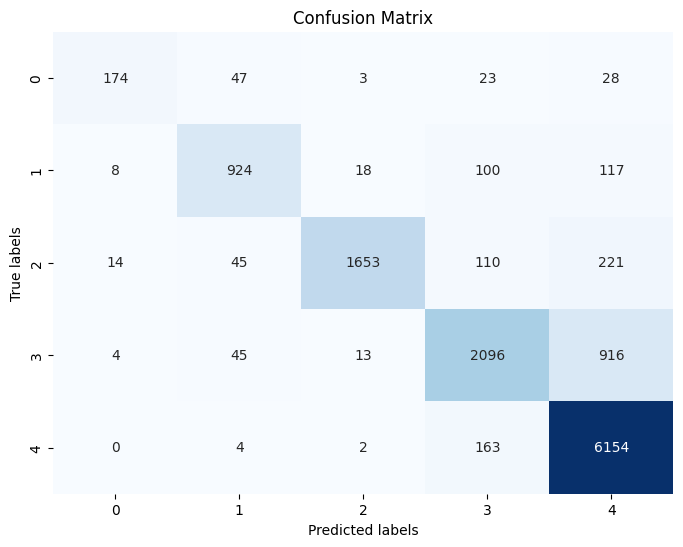

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = svm_model.predict(x_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# NEURAL NETWORKS
---
RNN, LSTM models


### RNN
---
For Epoch = 10

In [ ]:
numeric_columns = data_btm.select_dtypes(include=['float64', 'int64']).columns
data_btm[numeric_columns] = data_btm[numeric_columns].astype('float32')

import pickle
with open('/content/drive/MyDrive/Kaggle/word2vec_model.pkl', 'rb') as f:
    word2vec_model = pickle.load(f)
vocab_size = len(word2vec_model.wv.key_to_index)
import numpy as np
def compute_awe(embeddings_sequences):
    awe_list = []
    for sequence in embeddings_sequences:
        average_embedding = np.mean(sequence, axis=0)
        awe_list.append(average_embedding)
    return np.array(awe_list)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
y = data_btm['Sentiment_Class']
awe_features = compute_awe(data_btm['word_embeddings_of_reviews'])
x_other_features = data_btm[['online_order', 'book_table', 'rate', 'rest_type', 'cuisines', 'cost(for 2)', 'dining_type']]
x = np.concatenate([x_other_features, awe_features], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

In [ ]:
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Embedding(vocab_size, 128),  # Embedding layer for word embeddings
    layers.SimpleRNN(128),  # Simple RNN layer
    layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
    layers.Dense(5, activation='softmax')  # Output layer with softmax activation
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=5)

y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=5)
history = model.fit(x_train, y_train_categorical, epochs=10, batch_size=32, validation_data=(x_val, y_val_categorical))
loss, accuracy = model.evaluate(x_test, y_test_categorical)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/10
1208/1208 [==============================] - 66s 52ms/step - loss: 0.8964 - accuracy: 0.6402 - val_loss: 0.7949 - val_accuracy: 0.6737
Epoch 2/10
1208/1208 [==============================] - 62s 51ms/step - loss: 0.6993 - accuracy: 0.7290 - val_loss: 0.6469 - val_accuracy: 0.7569
Epoch 3/10
1208/1208 [==============================] - 61s 50ms/step - loss: 0.5709 - accuracy: 0.7890 - val_loss: 0.5322 - val_accuracy: 0.8097
Epoch 4/10
1208/1208 [==============================] - 66s 54ms/step - loss: 0.4832 - accuracy: 0.8268 - val_loss: 0.5094 - val_accuracy: 0.8207
Epoch 5/10
1208/1208 [==============================] - 81s 67ms/step - loss: 0.4358 - accuracy: 0.8448 - val_loss: 0.5035 - val_accuracy: 0.8255
Epoch 6/10
1208/1208 [==============================] - 61s 51ms/step - loss: 0.4035 - accuracy: 0.8589 - val_loss: 0.4250 - val_accuracy: 0.8511
Epoch 7/10
1208/1208 [==============================] - 84s 70ms/step - loss: 0.3765 - accuracy: 0.8711 - val_loss: 0.3865 -

In [ ]:
from sklearn.metrics import classification_report
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred))

403/403 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

         0.0       0.81      0.74      0.77       275
         1.0       0.86      0.77      0.81      1167
         2.0       0.89      0.87      0.88      2043
         3.0       0.82      0.81      0.81      3074
         4.0       0.90      0.94      0.92      6323

    accuracy                           0.88     12882
   macro avg       0.86      0.82      0.84     12882
weighted avg       0.88      0.88      0.88     12882



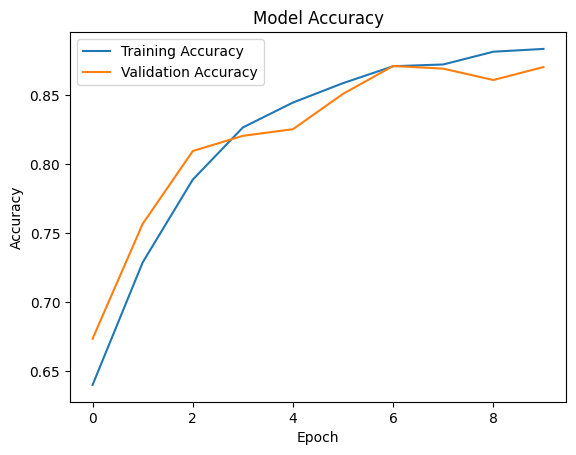

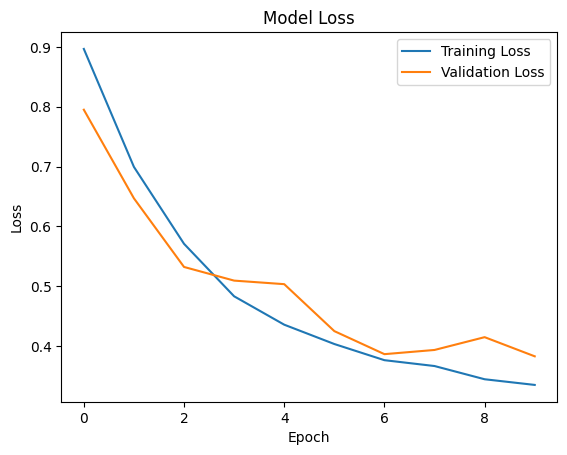

In [ ]:
import matplotlib.pyplot as plt
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
import pickle
file_path = '/content/drive/MyDrive/Kaggle/simpleRNN_model_val.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

---
For Epoch = 7

In [ ]:
model = Sequential([
    layers.Embedding(vocab_size, 128),  # Embedding layer for word embeddings
    layers.SimpleRNN(128),  # Simple RNN layer
    layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
    layers.Dense(5, activation='softmax')  # Output layer with softmax activation
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=5)

y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=5)
history = model.fit(x_train, y_train_categorical, epochs=7, batch_size=32, validation_data=(x_val, y_val_categorical))
loss, accuracy = model.evaluate(x_test, y_test_categorical)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/7
1208/1208 [==============================] - 88s 70ms/step - loss: 0.8837 - accuracy: 0.6441 - val_loss: 0.7809 - val_accuracy: 0.6916
Epoch 2/7
1208/1208 [==============================] - 85s 70ms/step - loss: 0.7033 - accuracy: 0.7254 - val_loss: 0.7230 - val_accuracy: 0.7155
Epoch 3/7
1208/1208 [==============================] - 84s 70ms/step - loss: 0.5816 - accuracy: 0.7815 - val_loss: 0.5756 - val_accuracy: 0.7905
Epoch 4/7
1208/1208 [==============================] - 83s 69ms/step - loss: 0.5005 - accuracy: 0.8203 - val_loss: 0.5245 - val_accuracy: 0.8147
Epoch 5/7
1208/1208 [==============================] - 73s 61ms/step - loss: 0.4518 - accuracy: 0.8368 - val_loss: 0.4836 - val_accuracy: 0.8345
Epoch 6/7
1208/1208 [==============================] - 76s 63ms/step - loss: 0.4046 - accuracy: 0.8591 - val_loss: 0.4052 - val_accuracy: 0.8650
Epoch 7/7
403/403 [==============================] - 3s 7ms/step - loss: 0.4020 - accuracy: 0.8576
Loss: 0.40203016996383667
Accur

In [ ]:
from sklearn.metrics import classification_report
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred))

403/403 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

         0.0       0.85      0.60      0.71       275
         1.0       0.82      0.75      0.78      1167
         2.0       0.83      0.88      0.86      2043
         3.0       0.80      0.74      0.77      3074
         4.0       0.89      0.94      0.92      6323

    accuracy                           0.86     12882
   macro avg       0.84      0.78      0.81     12882
weighted avg       0.86      0.86      0.86     12882



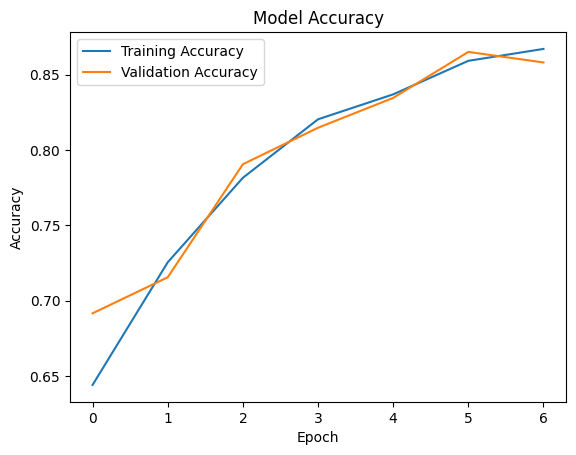

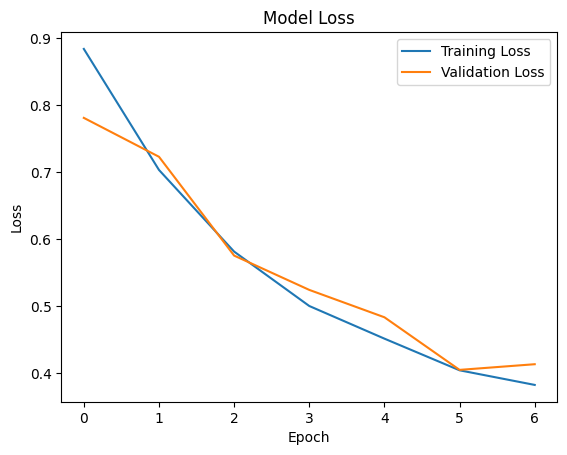

In [ ]:
import matplotlib.pyplot as plt
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
import pickle
file_path = '/content/drive/MyDrive/Kaggle/simpleRNN_model_val(e =7).pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

---
For Epoch = 15

In [ ]:
model = Sequential([
    layers.Embedding(vocab_size, 128),  # Embedding layer for word embeddings
    layers.SimpleRNN(128),  # Simple RNN layer
    layers.Dense(64, activation='relu'),  # Dense layer with ReLU activation
    layers.Dense(5, activation='softmax')  # Output layer with softmax activation
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=5)

y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=5)
history = model.fit(x_train, y_train_categorical, epochs=15, batch_size=32, validation_data=(x_val, y_val_categorical))
loss, accuracy = model.evaluate(x_test, y_test_categorical)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/15
1208/1208 [==============================] - 100s 81ms/step - loss: 0.8906 - accuracy: 0.6390 - val_loss: 0.7876 - val_accuracy: 0.6885
Epoch 2/15
1208/1208 [==============================] - 69s 57ms/step - loss: 0.6857 - accuracy: 0.7360 - val_loss: 0.6182 - val_accuracy: 0.7708
Epoch 3/15
1208/1208 [==============================] - 63s 52ms/step - loss: 0.5574 - accuracy: 0.7950 - val_loss: 0.5565 - val_accuracy: 0.7951
Epoch 4/15
1208/1208 [==============================] - 64s 53ms/step - loss: 0.4792 - accuracy: 0.8263 - val_loss: 0.4930 - val_accuracy: 0.8334
Epoch 5/15
1208/1208 [==============================] - 62s 51ms/step - loss: 0.4267 - accuracy: 0.8482 - val_loss: 0.4416 - val_accuracy: 0.8480
Epoch 6/15
1208/1208 [==============================] - 109s 90ms/step - loss: 0.3889 - accuracy: 0.8650 - val_loss: 0.4346 - val_accuracy: 0.8509
Epoch 7/15
1208/1208 [==============================] - 79s 65ms/step - loss: 0.3728 - accuracy: 0.8677 - val_loss: 0.3991

In [ ]:
from sklearn.metrics import classification_report
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred))

403/403 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76       275
         1.0       0.88      0.79      0.83      1167
         2.0       0.93      0.87      0.90      2043
         3.0       0.83      0.81      0.82      3074
         4.0       0.90      0.95      0.92      6323

    accuracy                           0.88     12882
   macro avg       0.87      0.83      0.85     12882
weighted avg       0.88      0.88      0.88     12882



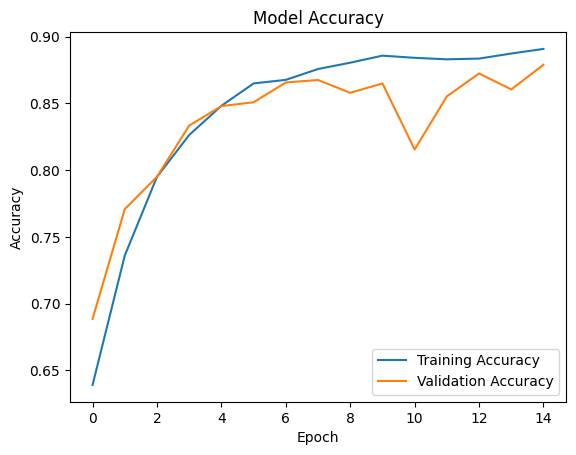

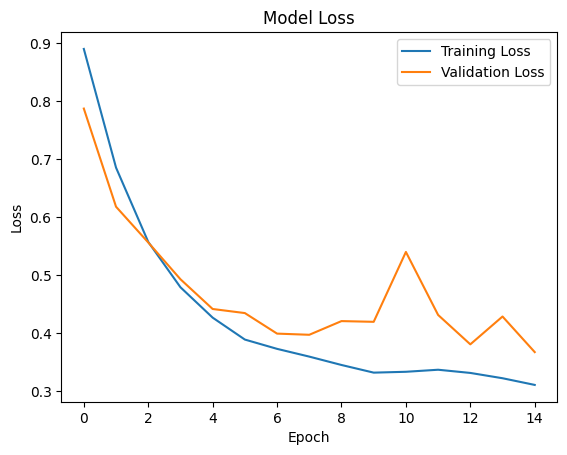

In [ ]:
import matplotlib.pyplot as plt
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
import pickle
file_path = '/content/drive/MyDrive/Kaggle/simpleRNN_model_val(e =15).pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

---
---
### LSTM
---
For Epoch = 10

In [ ]:
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Embedding(vocab_size, 128),
    layers.LSTM(128),  # LSTM layer
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=5)
y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=5)
history = model.fit(x_train, y_train_categorical, epochs=10, batch_size=32, validation_data=(x_val, y_val_categorical))
loss, accuracy = model.evaluate(x_test, y_test_categorical)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/10
1208/1208 [==============================] - 18s 13ms/step - loss: 1.0401 - accuracy: 0.5882 - val_loss: 0.9510 - val_accuracy: 0.6252
Epoch 2/10
1208/1208 [==============================] - 11s 9ms/step - loss: 0.9029 - accuracy: 0.6406 - val_loss: 0.8441 - val_accuracy: 0.6675
Epoch 3/10
1208/1208 [==============================] - 12s 10ms/step - loss: 0.7964 - accuracy: 0.6905 - val_loss: 0.7676 - val_accuracy: 0.7016
Epoch 4/10
1208/1208 [==============================] - 12s 10ms/step - loss: 0.6568 - accuracy: 0.7540 - val_loss: 0.6050 - val_accuracy: 0.7804
Epoch 5/10
1208/1208 [==============================] - 12s 10ms/step - loss: 0.5173 - accuracy: 0.8157 - val_loss: 0.4882 - val_accuracy: 0.8314
Epoch 6/10
1208/1208 [==============================] - 12s 10ms/step - loss: 0.4010 - accuracy: 0.8651 - val_loss: 0.3918 - val_accuracy: 0.8746
Epoch 7/10
1208/1208 [==============================] - 12s 10ms/step - loss: 0.3136 - accuracy: 0.8990 - val_loss: 0.3491 - 

In [ ]:
from sklearn.metrics import classification_report
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred))

403/403 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84       275
         1.0       0.90      0.88      0.89      1167
         2.0       0.95      0.92      0.93      2043
         3.0       0.91      0.88      0.89      3074
         4.0       0.93      0.97      0.95      6323

    accuracy                           0.93     12882
   macro avg       0.91      0.89      0.90     12882
weighted avg       0.93      0.93      0.93     12882



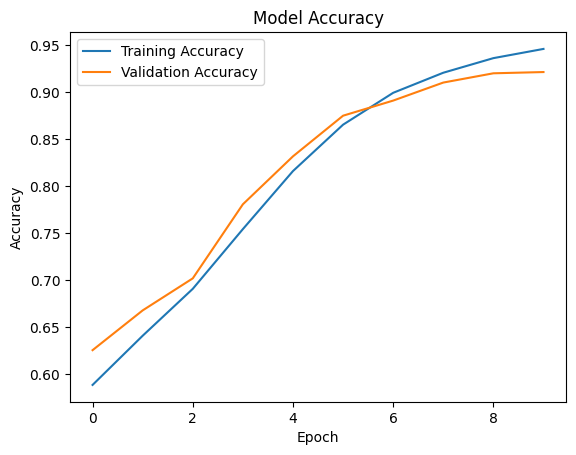

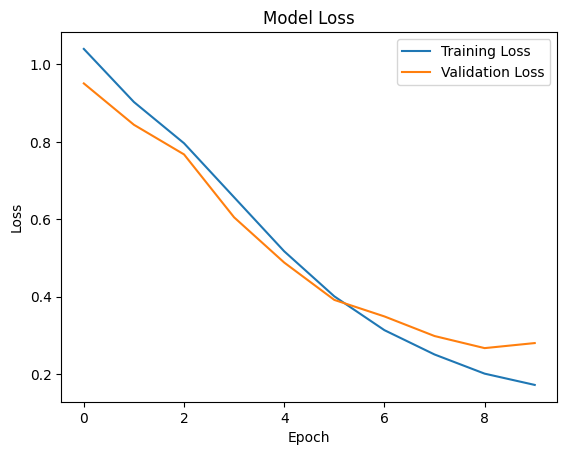

In [ ]:
import matplotlib.pyplot as plt
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
import pickle
file_path = '/content/drive/MyDrive/Kaggle/lstm_model_val.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

---
For Epoch = 7

In [ ]:
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Embedding(vocab_size, 128),
    layers.LSTM(128),  # LSTM layer
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=5)
y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=5)
history = model.fit(x_train, y_train_categorical, epochs=7, batch_size=32, validation_data=(x_val, y_val_categorical))
loss, accuracy = model.evaluate(x_test, y_test_categorical)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/7
1208/1208 [==============================] - 28s 20ms/step - loss: 1.0501 - accuracy: 0.5838 - val_loss: 0.9457 - val_accuracy: 0.6183
Epoch 2/7
1208/1208 [==============================] - 17s 14ms/step - loss: 0.9045 - accuracy: 0.6379 - val_loss: 0.8530 - val_accuracy: 0.6650
Epoch 3/7
1208/1208 [==============================] - 13s 10ms/step - loss: 0.7935 - accuracy: 0.6914 - val_loss: 0.7559 - val_accuracy: 0.7156
Epoch 4/7
1208/1208 [==============================] - 13s 10ms/step - loss: 0.6497 - accuracy: 0.7605 - val_loss: 0.6100 - val_accuracy: 0.7847
Epoch 5/7
1208/1208 [==============================] - 13s 10ms/step - loss: 0.5060 - accuracy: 0.8235 - val_loss: 0.5141 - val_accuracy: 0.8211
Epoch 6/7
1208/1208 [==============================] - 13s 10ms/step - loss: 0.3908 - accuracy: 0.8694 - val_loss: 0.4004 - val_accuracy: 0.8707
Epoch 7/7
403/403 [==============================] - 2s 4ms/step - loss: 0.3438 - accuracy: 0.8948
Loss: 0.3438207805156708
Accura

In [ ]:
from sklearn.metrics import classification_report
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred))

403/403 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81       275
         1.0       0.92      0.78      0.84      1167
         2.0       0.95      0.87      0.91      2043
         3.0       0.84      0.85      0.85      3074
         4.0       0.90      0.95      0.93      6323

    accuracy                           0.89     12882
   macro avg       0.88      0.86      0.87     12882
weighted avg       0.90      0.89      0.89     12882



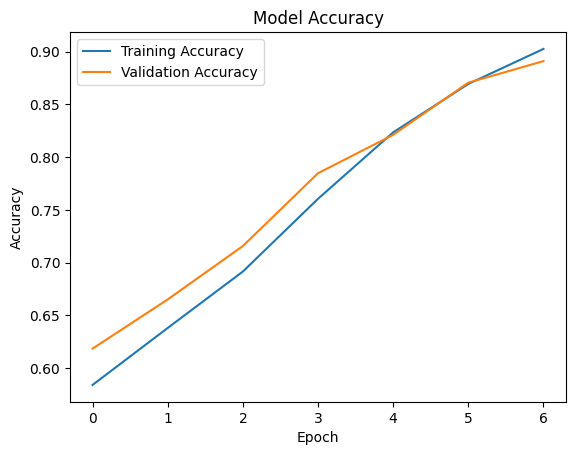

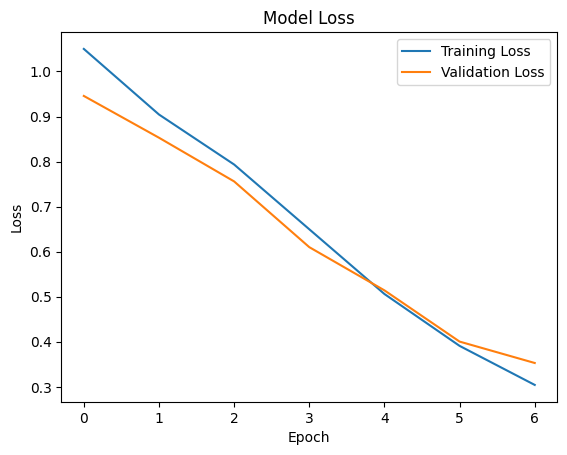

In [ ]:
import matplotlib.pyplot as plt
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
import pickle
file_path = '/content/drive/MyDrive/Kaggle/lstm_model_val(e=7).pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model, file)

---
For Epoch = 15

In [ ]:
from tensorflow.keras import layers, Sequential

model = Sequential([
    layers.Embedding(vocab_size, 128),
    layers.LSTM(128),  # LSTM layer
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=5)
y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes=5)
history = model.fit(x_train, y_train_categorical, epochs=15, batch_size=32, validation_data=(x_val, y_val_categorical))
loss, accuracy = model.evaluate(x_test, y_test_categorical)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/15
1208/1208 [==============================] - 19s 14ms/step - loss: 1.0540 - accuracy: 0.5838 - val_loss: 0.9625 - val_accuracy: 0.6163
Epoch 2/15
1208/1208 [==============================] - 12s 10ms/step - loss: 0.9059 - accuracy: 0.6369 - val_loss: 0.8497 - val_accuracy: 0.6604
Epoch 3/15
1208/1208 [==============================] - 13s 10ms/step - loss: 0.7872 - accuracy: 0.6925 - val_loss: 0.7295 - val_accuracy: 0.7186
Epoch 4/15
1208/1208 [==============================] - 14s 12ms/step - loss: 0.6482 - accuracy: 0.7593 - val_loss: 0.6557 - val_accuracy: 0.7586
Epoch 5/15
1208/1208 [==============================] - 13s 11ms/step - loss: 0.5175 - accuracy: 0.8160 - val_loss: 0.5399 - val_accuracy: 0.8145
Epoch 6/15
1208/1208 [==============================] - 13s 11ms/step - loss: 0.4033 - accuracy: 0.8626 - val_loss: 0.3905 - val_accuracy: 0.8701
Epoch 7/15
1208/1208 [==============================] - 13s 10ms/step - loss: 0.3189 - accuracy: 0.8943 - val_loss: 0.3622 -

In [ ]:
from sklearn.metrics import classification_report
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred))

403/403 [==============================] - 2s 3ms/step
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       275
         1.0       0.95      0.91      0.93      1167
         2.0       0.95      0.94      0.95      2043
         3.0       0.95      0.92      0.93      3074
         4.0       0.96      0.98      0.97      6323

    accuracy                           0.95     12882
   macro avg       0.93      0.93      0.93     12882
weighted avg       0.95      0.95      0.95     12882



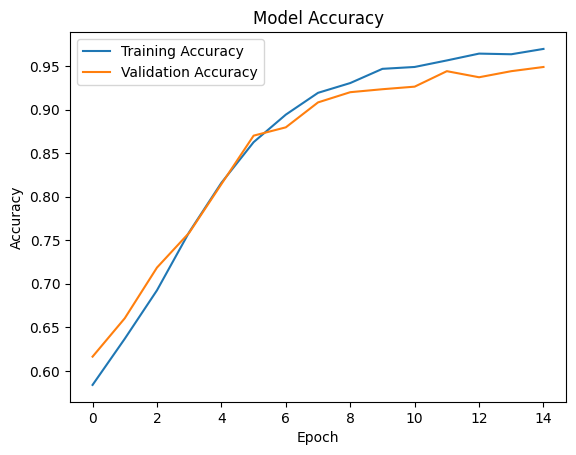

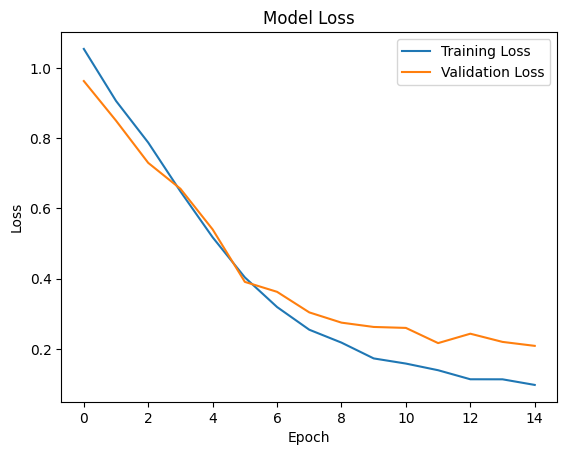

In [ ]:
import matplotlib.pyplot as plt
# Plotting accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [ ]:
import pickle
file_path = '/content/drive/MyDrive/Kaggle/lstm_model_val(e=15).pkl'
with open(file_path, 'wb') as file:
    pickle.dump(model, file)